# Class를 쓰는 이유?

- **객체지향 프로그래밍**을 하기 위해서
- 클래스간의 상속 관계를 정의할 수 있도록 하여 한 프로그램 내의 중복 코드를 최소화하며 결과 유지 보수도 용이하게 해줌

<div>
 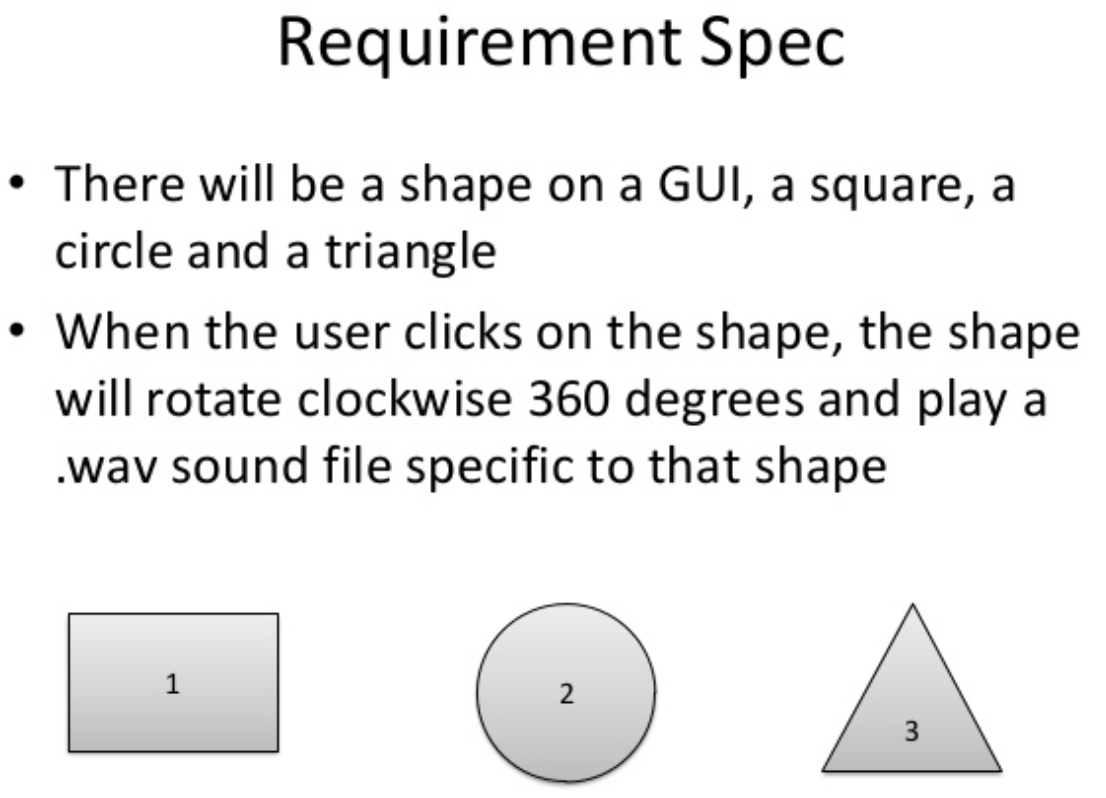
</div>

<div>
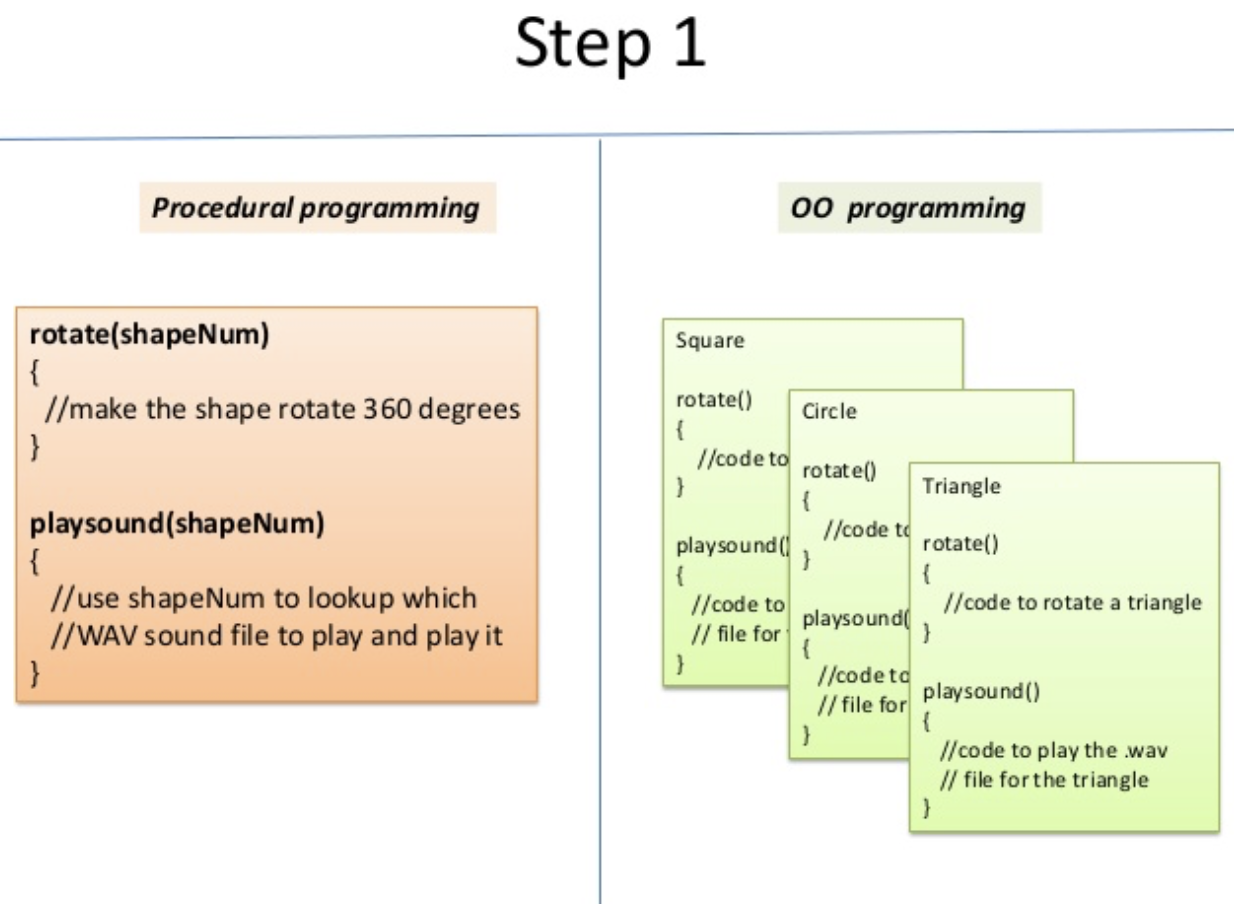
</div>

<div>
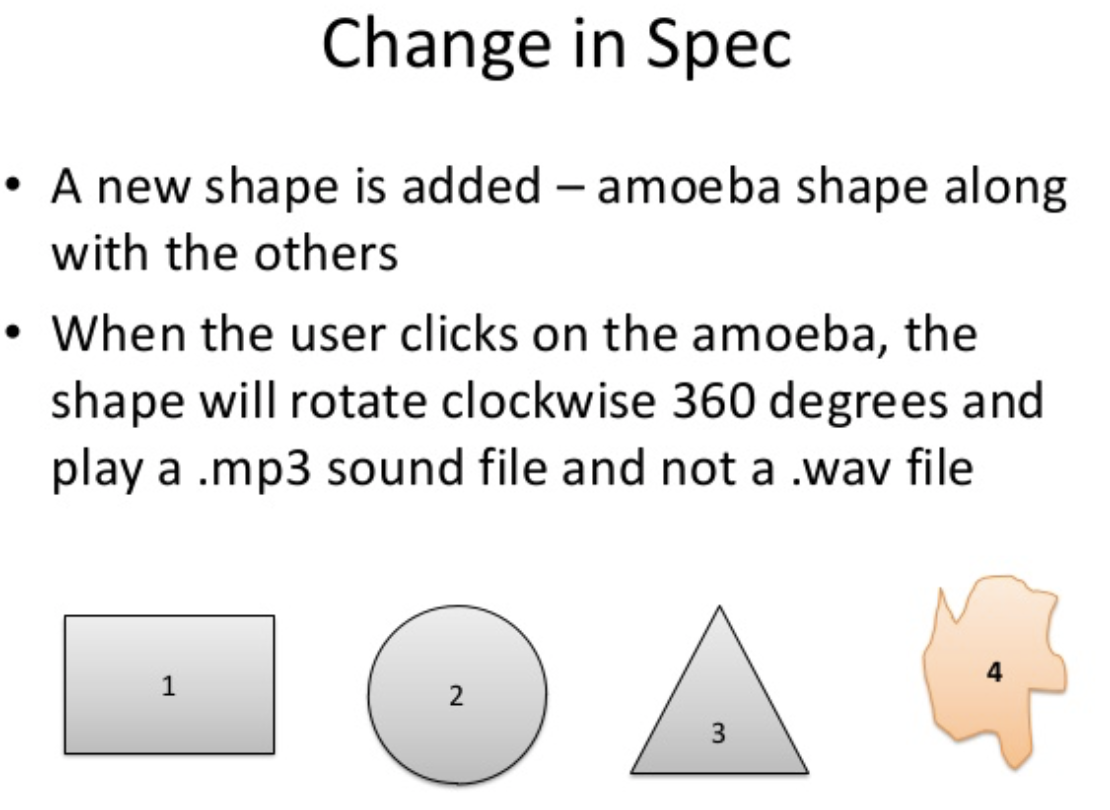
</div>

<div>
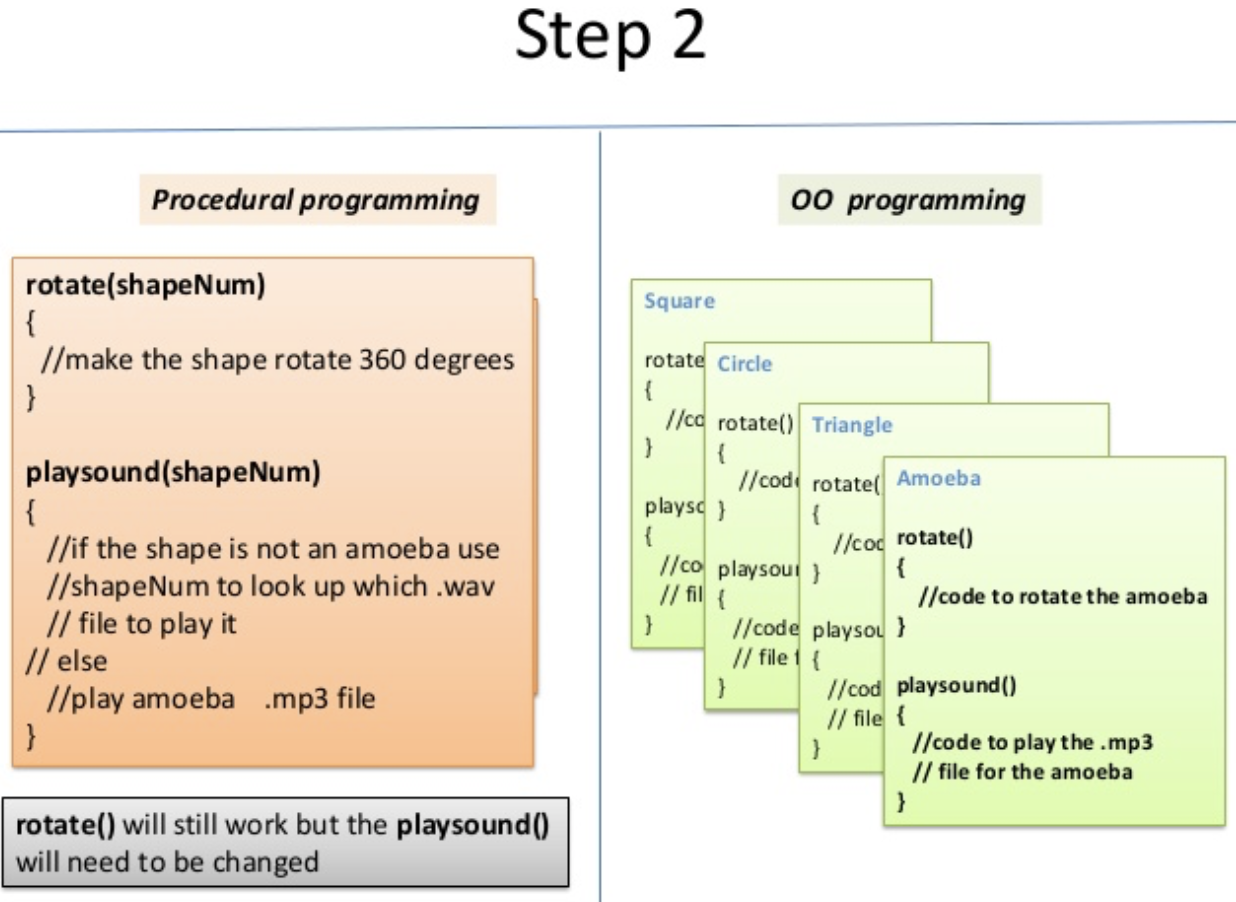
</div>

<div>
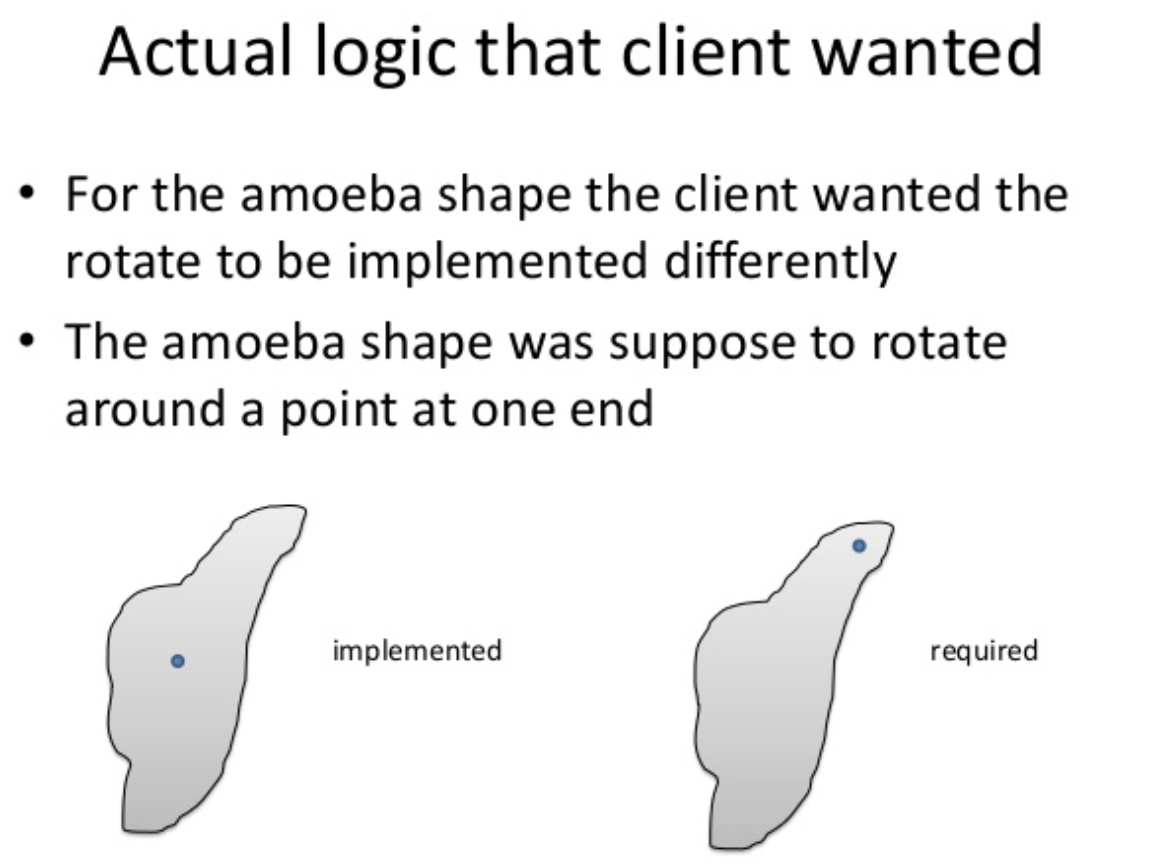
</div>

<div>
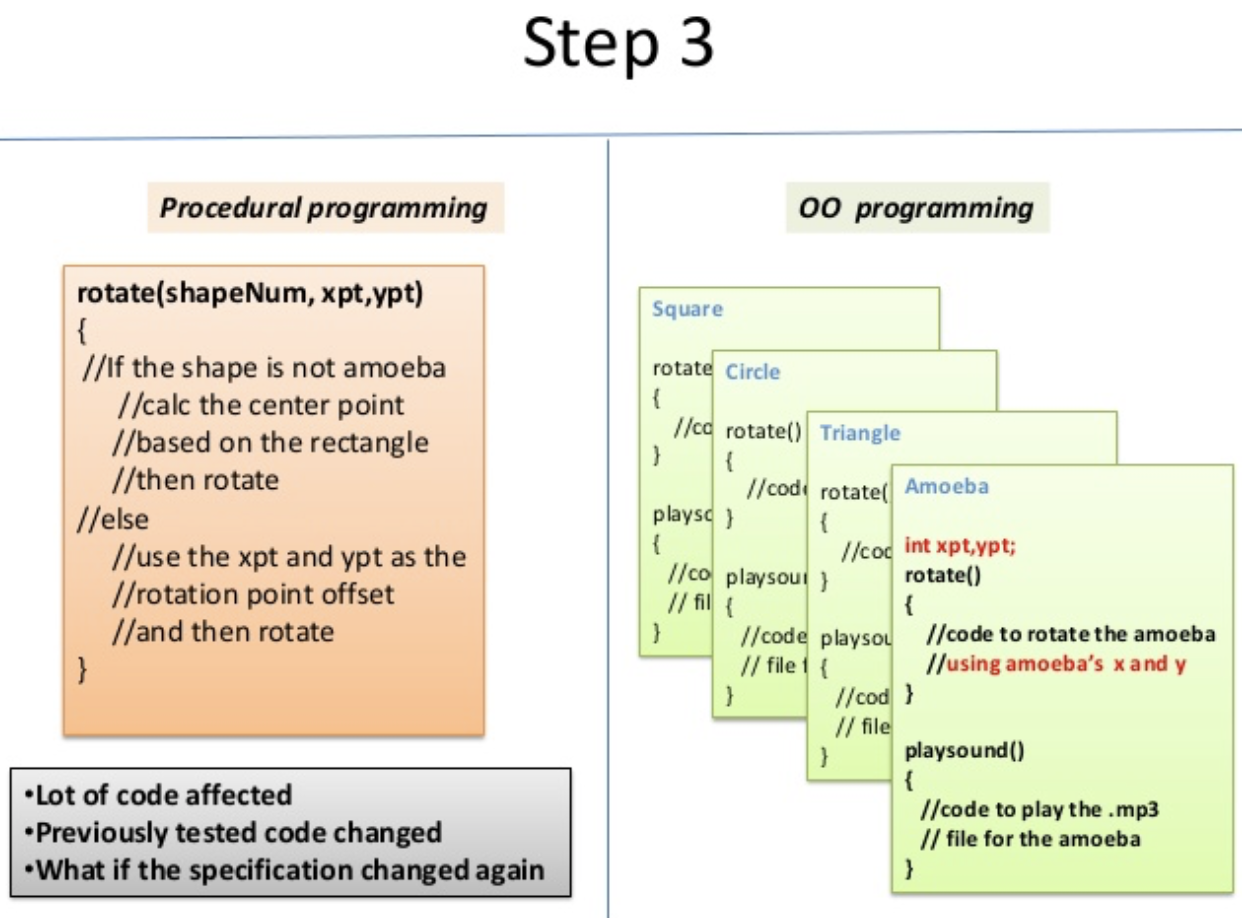
</div>

<div>
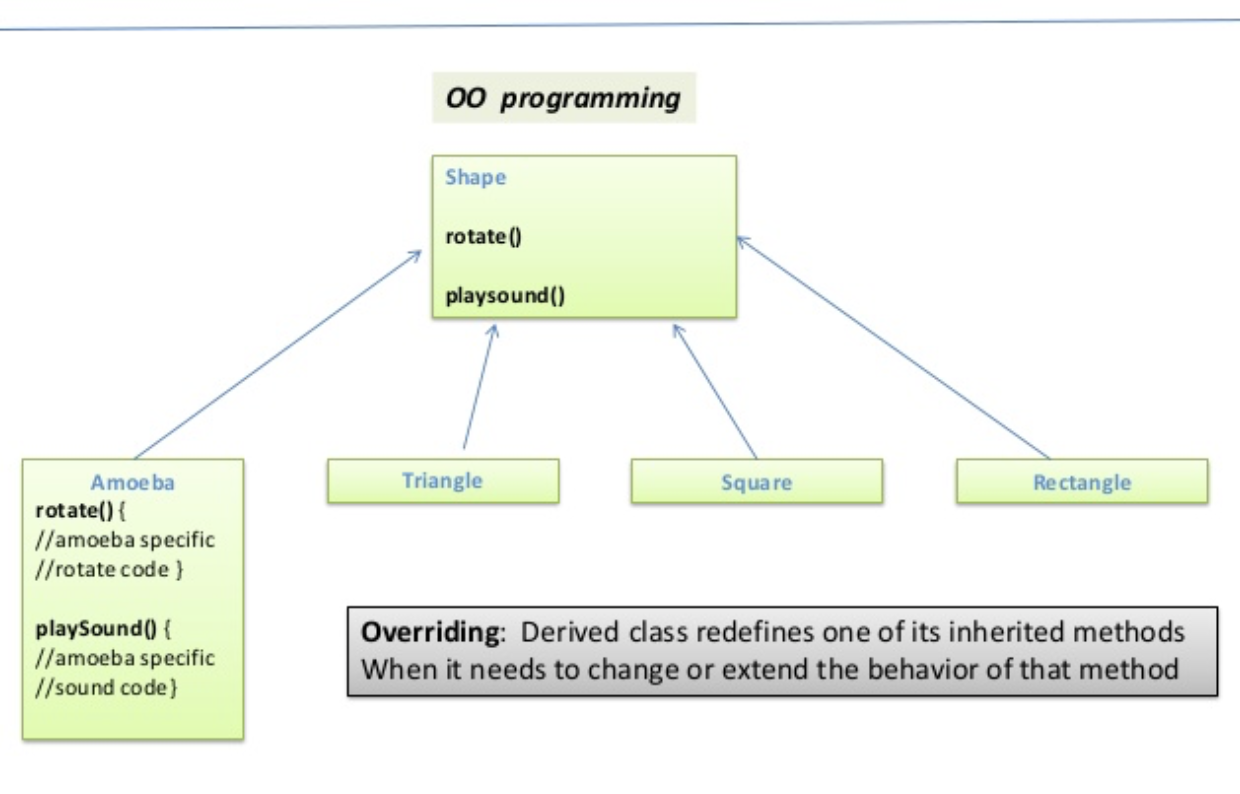
</div>

# 객체지향 (OOP)
  
- **상속 (Inheritance)**
  - 상위 개념의 특징을 하위 개념이 물려 받는 것
  
- **추상화(Abstraciton)**
  - 공통의 속성이나 기능을 묶어 이름을 붙이는 것
  - OOP 에서 클래스를 정의하는 것을 추상화라고 할 수 있다
  
- **다형성 (Polymorphism)**
  - 보이는 이름은 같지만 실제 모습 혹은 행위는 다른 특징
  - 부모 클래스로부터 물려받은 가상 함수를 자식 클래스 내에서 오버라이딩 하여 사용하는 것
  
- **캡슐화 (Encapsulation)**
  - 변수와 함수를 하나로 묶어서 외부에서의 접근을 막고, 함수를 통해서만 접근 가능하도록 하는 것
  - 객체가 맡은 역할을 수행하기 위한 데이터를 하나로 묶는다 (**은닉화**)

## 1. 상속

<div>
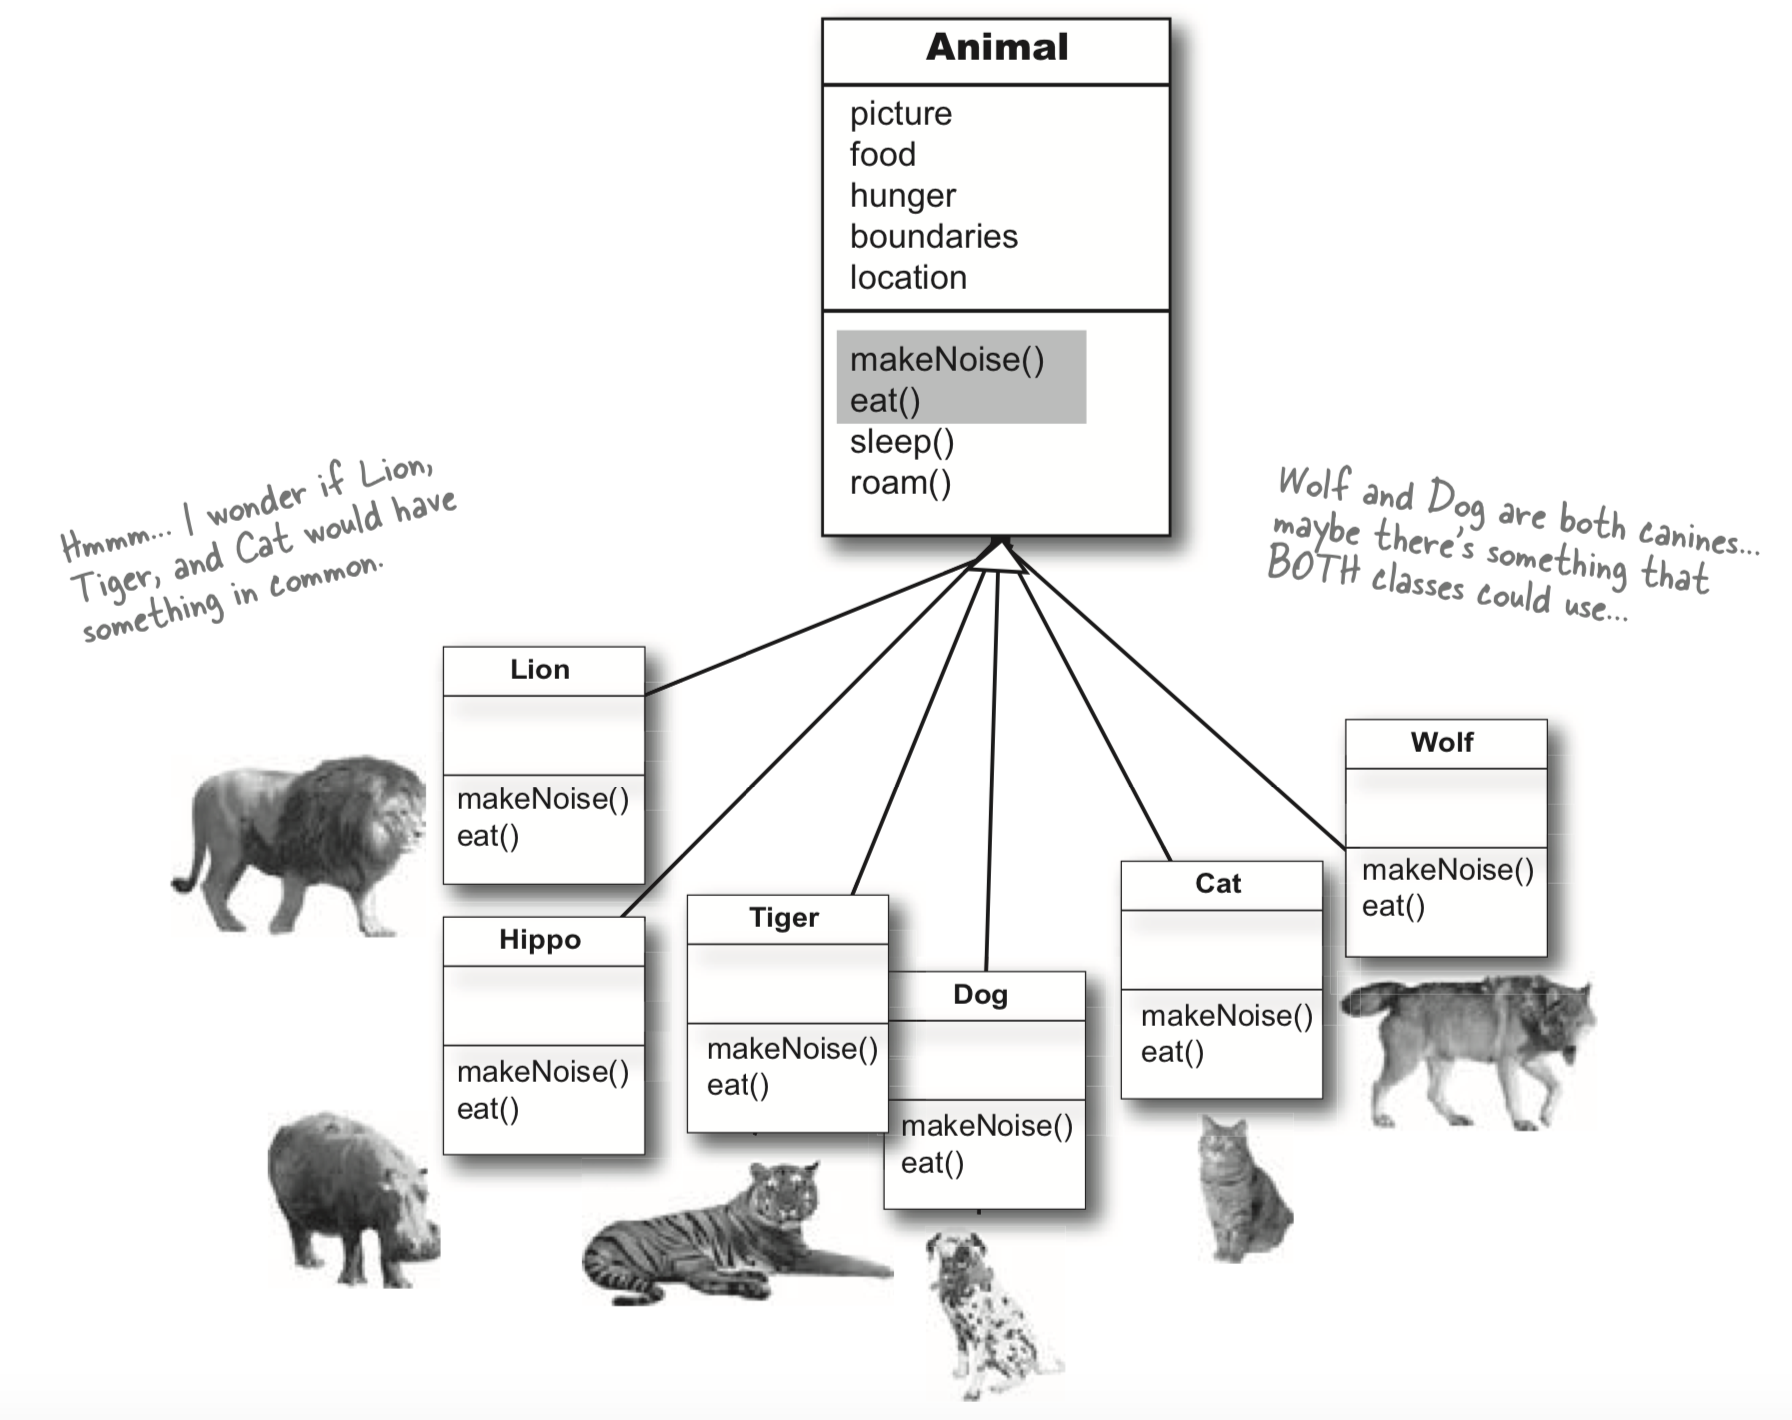
</div>

In [34]:
class Animal(object):
    
    def __init__(self, food, hunger, location):
        self.food = food
        self.hunger = hunger
        self.location = location
        
    def makeNoise(self):
        print("이것은 Animal이 내는 소리")
    
    def eat(self):
        print("{}을 먹는다".format(self.food))
        
    def sleep(self):
        print("잔다")

    def roam(self):
        print("어흥")

In [35]:
ani = Animal("동물밥",10,"대한민국")

In [36]:
ani.makeNoise()
ani.eat()
ani.sleep()

이것은 Animal이 내는 소리
동물밥을 먹는다
잔다


In [48]:
class Lion(Animal):
    
    def __init__(self, food, hunger, location):
        super(Lion, self).__init__(food, hunger, location)
        
    def makeNoise(self):
        print("이것은 Lion이 내는 소리")
        print("소리가 추가도 되지!")
        print("===================")
        
    def eat(self):
        print("{}에서".format(self.location))
        super(Lion, self).eat()

In [49]:
lion = Lion("고기", 10, "경기도")

In [50]:
lion.makeNoise()
lion.eat()

이것은 Lion이 내는 소리
소리가 추가도 되지!
경기도에서
고기을 먹는다


In [51]:
lion.sleep()

잔다


# 2. 추상화 (abstract)

- 게임에 존재하는 캐릭터는 hp, 공격력 등 공통적으로 갖고 있는 **공통 특성**이 있다
- 이러한 **공통 특성을 가진 부모 클래스**를 만들고 해당 클래스는 **객체 인스턴스**를 생성할 수 없게 하는것을 **추상 클래스**라고 한다
- ‘다시 말해 **추상클래스**란 해당 클래스를 통해 만들어낸 객체가 전혀 객체의 모습을 띄지 못할 때, **해당 클래스가 객체를 생성할 수 없도록** 하는 것

## Character 클래스 (추상클래스, 부모클래스) 

- 게임의 모든 캐릭터가 가진 공통 속성을 정의하는 **Character 클래스**를 정의한다 (단, 추상 클래스로 정의한다)
- **추상 클래스**는 **@abstractmethod** 데코레이터를 활용한 1개 이상의 **abstract method**를 가져야 한다
- **추상 클래스**를 정의 할 때는 **from abc import * 모듈 적용**이 필요하다
- **추상 클래스**란 미구현 **추상 메소드**를 한개 이상 가지며, 자식클래스에서 해당 **추상 메소드**를 반드시 구현하도록 강제합니다.
- 상속받은 클래스는 **추상 메소드**를 구현하지 않아도, import할 때까지 에러는 발생하지 않으나 객체를 생성할 시 에러가 발생합니다.

In [17]:
## 출처 : https://wayhome25.github.io/cs/2017/04/10/cs-11/
from abc import ABCMeta # Abstract Base Class

class Character(metaclass = ABCMeta):
  def __init__(self):
    self.hp = 100
    self.attack_power = 20

  def attack(self, other, attack_kind):
    other.get_damage(self.attack_power, attack_kind)

  @abstractmethod # Character 클래스를 상속받는 모든 클래스는 하기 함수를 오버라이딩으로 구현해야 인스턴스 생성이 가능하다.  
  def get_damage(self, attack_power, attack_kind):
    pass

class Player(Character):

  def other_func(self):
    print("other")

In [18]:
ch1 = Character()

TypeError: Can't instantiate abstract class Character with abstract methods get_damage

In [19]:
p1 = Player()

TypeError: Can't instantiate abstract class Player with abstract methods get_damage

# 3. 다형성 (polymorphism)

- **상속**과 함께 **OOP**에서 중요한 개념 중 하나
- 동일한 코드이지만 동작방법, 결과가 다른 것을 의미한다.
- **오버로딩**은 같은 의미지만 매개변수의 데이터타입이 무엇이냐에 따라서 다른 메소드가 호출되는 방식이다
- 다형성을 잘 쓰면 IF / ELSE 문을 많이 줄일 수 있다.

## 다형성 예시
- **추상 클래스**인 **Character 클래스**를 상속 받아서 **Player, Monster 클래스**를 각각 정의한다

## 추상클래스의 자식 클래스 (Player)

In [10]:
class Player(Character):

  def get_damage(self, attack_power, attack_kind):
    self.hp -= attack_power

## 추상클래스의 자식 클래스 (IceMonster, FireMonster : 다형성 적용)
- 매개변수 attack_kind에 따라서 get_damage 메소드의 작동 방식을 분기처리한다.

In [11]:
class IceMonster(Character):
  def get_damage(self, attack_power, attack_kind):
    if attack_kind == 'ICE':
      self.hp += attack_power
    else:
      self.hp -= attack_power

  def __str__(self):
        return "Ice Monster's HP : {}".format(self.hp)

class FireMonster(Character):
  def get_damage(self, attack_power, attack_kind):
    if attack_kind == 'FIRE':
      self.hp += attack_power
    else:
      self.hp -= attack_power

  def __str__(self):
    return "Fire Monster's HP : {}".format(self.hp)

In [12]:
play = Player()
ice = IceMonster()
fire = FireMonster()

print(ice) # Ice MOnster's HP : 100
print(fire) # Fire MOnster's HP : 100

Ice Monster's HP : 100
Fire Monster's HP : 100


In [13]:
play.attack(ice, 'ICE')
play.attack(fire, 'ICE')

print(ice) # Ice MOnster's HP : 120
print(fire) # Fire MOnster's HP : 80

Ice Monster's HP : 120
Fire Monster's HP : 80


# 4. 캡슐화 (Encapsulation)

- **캡슐화**는 여러 가지 멤버를 하나의 형식으로 묶는 과정을 말하며 클래스를 통해 구현합니다
- 특히 클래스에 멤버를 정의할 때 **어느 영역에서 해당 멤버에 접근할 수 있는지를 지정**할 수 있게 합니다
- 이를통해 주요 멤버에 **외부에서 접근하여 잘못된 상태가 만들어지지 않게** 지원합니다

### ex)
- 유닛의 멤버 필드 중에 체력이 0에서 100 사이를 유지한다고 가정합시다
- 운동하면 체력이 1 증가하고 술 마시면 체력이 1 감소하게 코드를 작성했고요
- 유닛의 체력 멤버 필드에 직접 접근하여 값을 변경한다면 이상한 값(0보다 작거나 100보다 큰 값)을 갖을 수도 있습니다
- 이러한 논리적 버그를 방지하려면 유닛을 정의할 때 외부에서 체력 멤버 필드에 직접 접근하는 것을 허용하지 말아야 합니다

**멤버 이름 앞에 언더바(_)가 두 개 붙으면 해당 형식 내부에서만 접근이 가능합니다. 이는 다른 OOP 언어의 private 접근 지정과 같습니다**

In [20]:
class Unit:
    def __init__(self,name):
        self.__name = name
        self.__hp=100

In [21]:
unit = Unit("홍길동")

In [22]:
unit.__name

AttributeError: 'Unit' object has no attribute '__name'

In [24]:
unit.__hp

AttributeError: 'Unit' object has no attribute '__hp'

In [25]:
class Unit:
    def __init__(self,name):
        self.name = name
        self.hp=100

In [27]:
unit = Unit("홍길동")

In [28]:
unit.name

'홍길동'

- 만약 외부에서 멤버 필드에 접근할 필요가 있다면 **접근자 메서드(getter)**를 제공하세요
- 외부에서 멤버 필드를 설정할 필요가 있다면 **설정자 메서드(setter)**를 제공하세요

In [29]:
class Unit:
    def __init__(self,name):
        self.__name = name
        self.__hp=100
 
    def GetHP(self):
        return self.__hp
 
    def GetName(self):
        return self.__name
 
    def __SetHP(self, hp):
        if(hp<0):
            hp = 0
        if(hp>100):
            hp = 100
        self.__hp = hp
 
    def Play(self,hour):
        print(hour,"시간 운동하다.")
        self.__SetHP(self.__hp+hour)
 
    def Drink(self, cups):
        print(cups,"잔 마시다.")
        self.__SetHP(self.__hp-cups)

In [37]:
unit = Unit("홍길동")
print("유닛 이름 : {0} 체력 : {1}".format(unit.GetName(), unit.GetHP()))

유닛 이름 : 홍길동 체력 : 100


In [38]:
unit.Drink(3)
print("유닛 이름 : {0} 체력 : {1}".format(unit.GetName(), unit.GetHP()))

3 잔 마시다.
유닛 이름 : 홍길동 체력 : 97


In [39]:
unit.Play(5)
print("유닛 이름 : {0} 체력 : {1}".format(unit.GetName(), unit.GetHP()))

5 시간 운동하다.
유닛 이름 : 홍길동 체력 : 100
